<a href="https://colab.research.google.com/github/aman440/DSAinC/blob/master/Mini_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('breast_cancer.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
df.drop(['Unnamed: 32', 'id'], axis = 1) 
print(df.shape) 

(569, 33)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
x = df.iloc[:,2:32].values
y = df.iloc[:,1].values

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


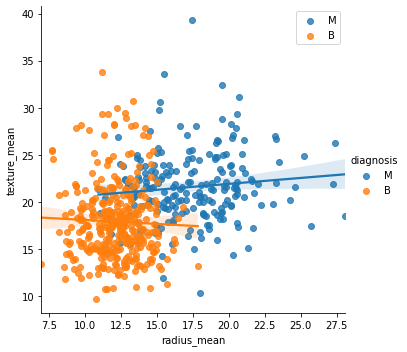

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x = 'radius_mean', y = 'texture_mean', hue = 'diagnosis', data = df)
plt.legend() 
plt.show()

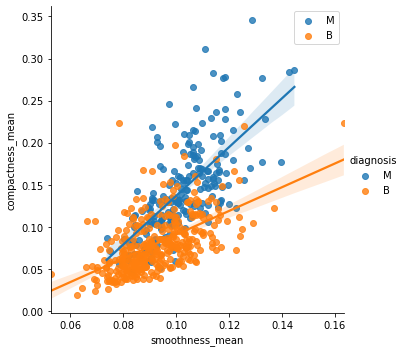

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x ='smoothness_mean', y = 'compactness_mean', hue = 'diagnosis', data = df)
plt.legend() 
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
x_train.shape

(426, 30)

In [12]:
x_test.shape

(143, 30)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [14]:
x_train

array([[0.23044157, 0.32157676, 0.21940433, ..., 0.31484671, 0.30277942,
        0.09858323],
       [0.20062473, 0.42116183, 0.19452699, ..., 0.06965208, 0.34042973,
        0.06677161],
       [0.62232003, 0.76929461, 0.60403566, ..., 0.56079917, 0.19850187,
        0.07431457],
       ...,
       [0.11619102, 0.35726141, 0.11077327, ..., 0.17402687, 0.17524147,
        0.17263545],
       [0.12963226, 0.35311203, 0.11706171, ..., 0.        , 0.06780997,
        0.06919848],
       [0.21434995, 0.59004149, 0.21235575, ..., 0.33251808, 0.10782574,
        0.21172767]])

In [15]:
model = KNeighborsClassifier(n_neighbors=21)

In [16]:
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [17]:
y_pred

array(['M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B',
       'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M'],
      dtype=object)

In [18]:
y_test

array(['M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B',
       'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M'],
      dtype=object)

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

96.5034965034965

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[89,  1],
       [ 4, 49]])

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           B       0.96      0.99      0.97        90
           M       0.98      0.92      0.95        53

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143

